<a href="https://colab.research.google.com/github/vardhanreddy2003/DeepLearning_projects/blob/main/WineQualityPrediction(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("/content/winequality-red.csv")

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [30]:
df["quality"]=np.where(df["quality"]>5,1,0)

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential

In [37]:
model=Sequential()

model.add(Dense(128,activation="relu",input_dim=11))
model.add(Dropout(0.35))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [39]:
history=model.fit(df.drop(columns=["quality"]),df["quality"],validation_split=0.2,epochs=250)

Epoch 1/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5490 - loss: 1.7132 - val_accuracy: 0.5875 - val_loss: 0.6856
Epoch 2/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5879 - loss: 0.9876 - val_accuracy: 0.5688 - val_loss: 0.7125
Epoch 3/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5956 - loss: 0.8446 - val_accuracy: 0.5750 - val_loss: 0.6803
Epoch 4/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5728 - loss: 0.8273 - val_accuracy: 0.5625 - val_loss: 0.6722
Epoch 5/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 0.7536 - val_accuracy: 0.5125 - val_loss: 0.6938
Epoch 6/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5958 - loss: 0.7319 - val_accuracy: 0.5719 - val_loss: 0.6820
Epoch 7/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5929 - loss: 0.7102 - val_accuracy: 0.5688 - val_loss: 0.6787
Epoch 8/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5596 - loss: 0.7161 - val_accuracy: 0.5875 - 

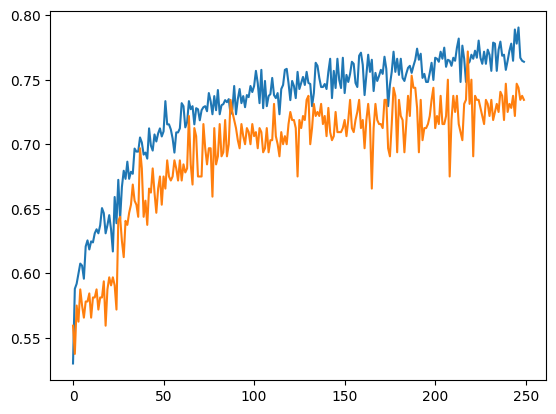

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])